In [1]:
from pandas import read_csv, DataFrame
import numpy as np
from seaborn import heatmap
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [2]:
dataset = read_csv('D:/Prog/ML/tasks for education/regression/1/ENB2012_data.csv', dtype=np.float32)
dataset = dataset.iloc[:,:-2]
dataset.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55,21.330000
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,15.55,21.330000
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55,21.330000
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,15.55,21.330000
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,20.84,28.280001


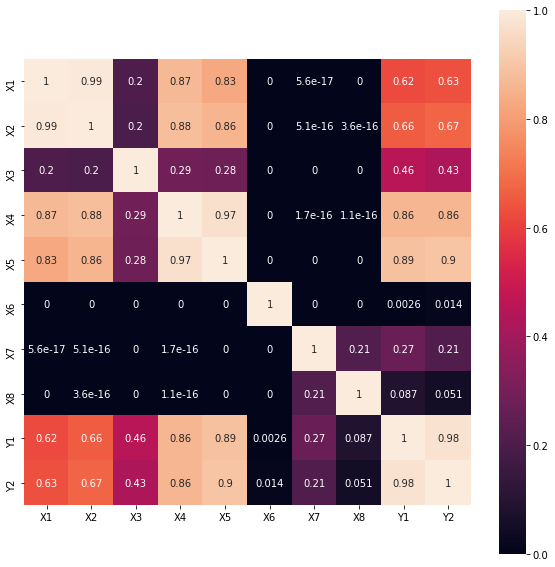

In [3]:
plt.figure(figsize=(10,10))
heatmap(abs(dataset.corr()), annot=True, square=True)

In [4]:
dataset = dataset.drop(['X1','X4'], axis=1).dropna()
dataset.head()

,X2,X3,X5,X6,X7,X8,Y1,Y2
0,514.5,294.0,7.0,2.0,0.0,0.0,15.55,21.330000
1,514.5,294.0,7.0,3.0,0.0,0.0,15.55,21.330000
2,514.5,294.0,7.0,4.0,0.0,0.0,15.55,21.330000
3,514.5,294.0,7.0,5.0,0.0,0.0,15.55,21.330000
4,563.5,318.5,7.0,2.0,0.0,0.0,20.84,28.280001


In [5]:
X = dataset.iloc[:,:-2]
y = dataset.iloc[:,-2:]

In [25]:
models = [LinearRegression(),
         RandomForestRegressor(n_estimators=100, max_features='sqrt'),
         RandomForestRegressor(n_estimators=50, max_features='sqrt'),
         KNeighborsRegressor(n_neighbors=6),
         SVR(kernel='linear')]

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.4)

In [30]:
Test_models = DataFrame()
tmp = {}
for model in models:
    m=str(model)
    tmp['Model'] = m[:m.index('(')]
    for i in range(y_train.shape[1]):
        model.fit(X_train,y_train.iloc[:, i])
        tmp['R2_Y%s'%str(i+1)] = r2_score(y_test.iloc[:,0], model.predict(X_test))
    Test_models = Test_models.append([tmp])
print(Test_models)
Test_models.set_index('Model', inplace=True)

                   Model     R2_Y1     R2_Y2
0       LinearRegression  0.896030  0.831987
0  RandomForestRegressor  0.994228  0.921898
0  RandomForestRegressor  0.992730  0.921575
0    KNeighborsRegressor  0.916524  0.836050
0                    SVR  0.850492  0.776217


In [31]:
print(Test_models)

                          R2_Y1     R2_Y2
Model                                    
LinearRegression       0.896030  0.831987
RandomForestRegressor  0.994228  0.921898
RandomForestRegressor  0.992730  0.921575
KNeighborsRegressor    0.916524  0.836050
SVR                    0.850492  0.776217


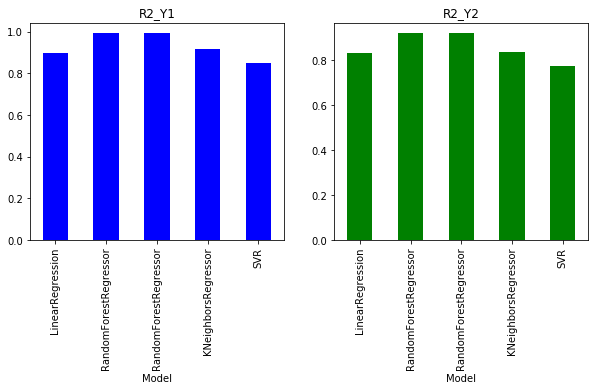

In [38]:
fig, axes = plt.subplots(ncols=2, figsize=(10,4))
Test_models.R2_Y1.plot(ax=axes[0], kind='bar', title='R2_Y1', color='blue')
Test_models.R2_Y2.plot(ax=axes[1], kind='bar', title='R2_Y2', color='green')

In [47]:
model.fit(X_train,y_train)
model.feature_importances_

ValueError: Found array with 0 feature(s) (shape=(460, 0)) while a minimum of 1 is required.

In [54]:
X_train = X_train.iloc[:,:-3]
X_test = X_test.iloc[:,:-3]

In [55]:
model=models[1]
for i in range(2):
    model.fit(X_train,y_train.iloc[:, i])
    tmp['R2_Y%s'%str(i+1)] = r2_score(y_test.iloc[:,0], model.predict(X_test))
print(tmp)

{'Model': 'SVR', 'R2_Y1': 0.9061526678819478, 'R2_Y2': 0.8427780144403061}
